In [14]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set style for better looking plots
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

# Display settings for pandas - show more rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")


Libraries imported successfully!


In [10]:
!pip install -q kaggle

import json

kaggle_credentials = {
     "username": "minukajayawardana", 
     "key": "KGAT_c2eb93dbbe35e359c880c8fe1e09b1d9" 
}

!mkdir -p ~/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d blastchar/telco-customer-churn

!mkdir -p data
!unzip -o telco-customer-churn.zip -d data/
!rm telco-customer-churn.zip  

print(" Dataset downloaded to data folder!")


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  telco-customer-churn.zip
  inflating: data/WA_Fn-UseC_-Telco-Customer-Churn.csv  
Archive:  telco-customer-churn.zip
  inflating: data/WA_Fn-UseC_-Telco-Customer-Churn.csv  
 Dataset downloaded to data folder!
 Dataset downloaded to data folder!


In [11]:

df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display first few rows to see what the data looks like
print("First 5 rows of the dataset:")
print(df.head())

print("\n Dataset loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")


First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [12]:
# Get detailed info about the dataset
print("Dataset Information:")
print(df.info())

print("\n" + "="*50)
print("Statistical Summary of Numerical Columns:")
print(df.describe())

print("\n" + "="*50)
print("Checking for missing values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


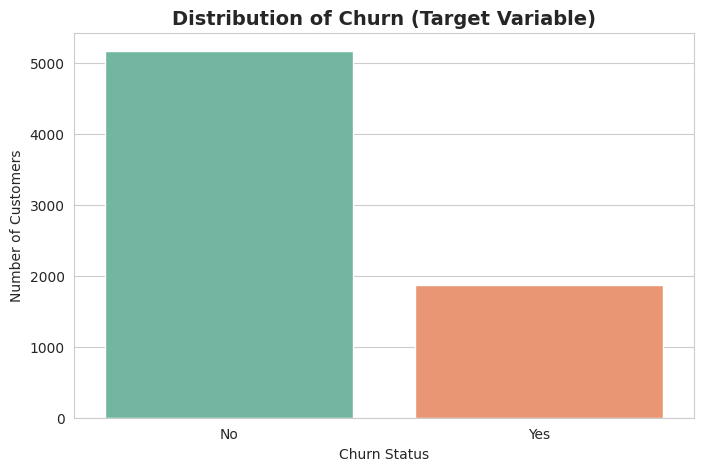

Target variable analyzed !


In [ ]:
# to count how many customers churned and stayed
print("Churn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Visualizing the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribution of Churn (Target Variable)', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

print("Target variable analyzed !")
